<a href="https://colab.research.google.com/github/33MarGomez/Interactive-Tutorials/blob/main/Inorganics_2_Condensations_and_Heteroatom_Additions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lesson 2 - Condensations and Heteroatoms
by: Marco Gomez

(Part of *Inorganics*, a four-part interactive series)

#Installations

Run these cells below to start up Psi4. If this installation doesn't work, search 'Psi4' + 'install' or 'installation' and someone's working import code will appear

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install_from_url("https://github.com/conda-forge/miniforge/releases/download/25.3.1-0/Miniforge3-Linux-x86_64.sh")

In [ ]:
import subprocess
import sys
subprocess.run("!mamba install -c anaconda intel-openmp", shell=True)
subprocess.run("conda config --add channels http://conda.anaconda.org/psi4", shell=True)
subprocess.run("mamba install psi4 resp -c conda-forge/label/libint_dev -c conda-forge", shell=True)

import os
import psi4
import math
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
subprocess.run("conda install dftd3-python -c conda-forge", shell=True)
subprocess.run("conda install gcp-correction -c conda-forge", shell=True)
subprocess.run("conda update -n base -c conda-forge conda", shell=True)
subprocess.run("pip install --upgrade pytest-dependency", shell=True)
subprocess.run("pip install --upgrade pluggy", shell=True)

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

# ☁ Polyatomics reveal transition state energies

Thermodynamic products form when enthalpy of reaction is more negative than activation energy. Kinetic products form when activation energy barriers are low in the system, but enthalpy of reaction is not necessarily negative. If a thermodynamic result reached by metals does not disrupt the balance of contributions between $\Psi^+ + \Psi^-$ and $\Psi_{cov}$ keeping $O^--S^+=O$ in close proximity to $2O^{-}$, this is a sign the orbitals are close to the energy of a bridging polyatomic - especially if multiple bond character exists between the metals.

I find chlorate's oxyanion series more instructive than sulfate's. $O^{2-}Cl^+O$ is intuitive, but now the lone-pair/radical trade must start, $O^{2-}(O^{2-})Cl^{5+}O$, or $ClO_3^{-}$, can be drawn with double-headed arrows. $ClO_{4}$ depletes chloride of its final lone pair. The reason why oxyanions have renewed as subjects of intense study is because the polyatomic is negatively charged. This means a sub-atomic particle's wave function is described equally by the information held by $(\Psi^+ + \Psi^-)^{*}\Psi_{cov}$ and could be used in informatics for loss-less state transfer. With considerations to charge build-up stability of the central heteroatom and electronics, these bridging compounds can be used to compare orbital energies.

Assuming that the bonding of the polyatomic is left unaffected, without any acceptance or donation properties, is not unreasonable. $O_2CMe$, colloquially vinegar, has the same Mo-Mo distances as the equivalent $O_2CCF_3$ bridged complex. $CF_3$ is the most electron-withdrawing group in traditional organic chemistry. Thus, using the Cl-Mo distances, by their similar electronegativity to oxygen, will be used across all bridging polyatomics. The cell below will produce graphs to this effect, but with no local optimization about the Cl-Mo 2.46 angrstom distance. You are welcome to look for better measurements by adding to the dist_OCme list numbers around 2.46, and adding the winning result to the success condition of the last if statement.

The coordinate set is slightly wrong and over-emphasizes hyperconjugation contributions as a slight distortion to non-aligned hydrogens. This is not expected to significantly impact the work, but was kept to emphasize the coordinates as arising from trigonometric considerations instead of resorting to vector construction - where those coordinates are difficult to trace. This is only to exposit practical skills.

Run an optional optimization exercise, and the $Mo_2(\mu-O_2CMe)_4$ simulation in the cell below.

Final energy is -1050.4383513929279 hartree
code took 48.76257918675741 minutes


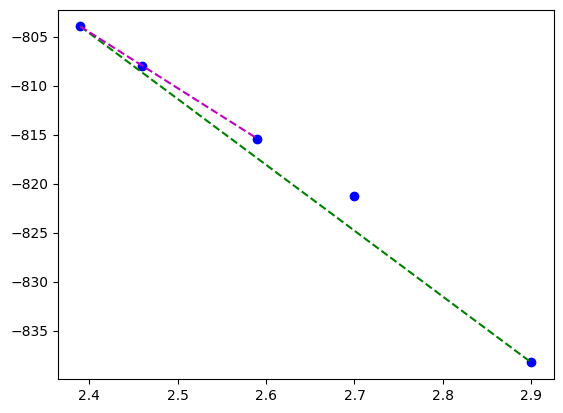

In [ ]:
print('This code takes 20 minutes if you run only the final simulation')
print('If you removed the hashtags for the optimization exercise, this took you 50 minutes start to finish.')
#please take care of yourself :) and put this in a word processor to replace # with spacebar
#Look for comments throughout the redacted code with ##

concave_energy = -1.0
e_seeker = 0
e_OCme = [1.0]
#e_OCme.remove(1.0)

#dist_OCme = [2.39, 2.46, 2.59, 2.7, 2.9]
##each adds about 3 minutes
#e_OCme = []

#psi4.set_options({'reference': 'uks',
                  #'maxiter': 2,
                  #'optking__geom_maxiter': 500,
                  #'opt_type': 'MIN',
                  #'fail_on_maxiter': False,
                     #})

#for i in dist_OCme:
  #posxy_O = float(i)
  #negxy_O = -1 * posxy_O
  #place_C = posxy_O + math.cos(math.pi / 6.0)
  #nplace_C = -1 * place_C
  #place_me = 1.54 + place_C
  #nplace_me = -1 * place_me
  #inradians1095 = (109.5/360.0)*2.0*math.pi
  #inradians195 = (19.5/360.0)*2.0*math.pi
  #h1z = 1.10 * math.cos(inradians195)
  #h1y = place_me + 1.10 * math.sin(inradians195)
  #negh1y = -1 * h1y
  #hy = place_me - 1.10 * math.sin(inradians1095) * math.cos(inradians1095)
  #neghy = -1 * hy
  #hx = -1.10 * math.sin(inradians1095) * math.sin(inradians1095)
  #neghx = -1 * hx
  #hz = math.cos(inradians1095)
  #mol = psi4.geometry("""
  #0 1
  #Mo 1.045 0.0 0.0
  #Mo -1.045 0.0 0.0
  #O 1.045 {0} 0.0
  #O 1.045 {1} 0.0
  #O 1.045 0.0 {0}
  #O 1.045 0.0 {1}
  #O -1.045 {0} 0.0
  #O -1.045 {1} 0.0
  #O -1.045 0.0 {0}
  #O -1.045 0.0 {1}
  #C 0.0 {2} 0.0
  #C 0.0 {3} 0.0
  #C 0.0 0.0 {2}
  #C 0.0 0.0 {3}
  #C 0.0 {4} 0.0
  #C 0.0 {5} 0.0
  #C 0.0 0.0 {4}
  #C 0.0 0.0 {5}
  #H 0.0 {12} {11}
  #H 0.0 {13} {11}
  #H 0.0 {11} {12}
  #H 0.0 {11} {13}
  #H {8} {6} {10}
  #H {9} {6} {10}
  #H {8} {7} {10}
  #H {9} {7} {10}
  #H {8} {10} {6}
  #H {9} {10} {6}
  #H {8} {10} {7}
  #H {9} {10} {7}
  #
  #units angstrom
  #symmetry c1
  #""".format(posxy_O,negxy_O,place_C,nplace_C,place_me, nplace_me, hy, neghy, hx, neghx, hz, h1z, h1y, negh1y)
  #)
  #d_energy, d_wfn = psi4.energy("b97-d/def2-tzvp", molecule=mol, return_wfn=True)
  #e_OCme.append(d_energy)

#e_seeker = min(e_OCme)
#e_seeker = e_OCme.index(e_seeker)
#coord_seeker = max(dist_OCme)
#coord_seeker = dist_OCme.index(coord_seeker)
#plt.plot(dist_OCme, e_OCme, 'bo')
#concavityfindx = []
#concavityfindy = []
#concavityfindy.append(e_OCme[e_seeker])
#concavityfindy.append(e_OCme[coord_seeker])
#concavityfindx.append(dist_OCme[e_seeker])
#concavityfindx.append(dist_OCme[coord_seeker])
#plt.plot(concavityfindx, concavityfindy, 'm--')
#plt.plot([2.39,2.9],[e_OCme[0],e_OCme[4]],'g--')
#plt.plot([2.39,2.59],[e_OCme[0],e_OCme[2]],'m--')
#plt.show()

#psi4.set_options({'reference': 'uks',
                  #'maxiter': 15,
                  #'optking__geom_maxiter': 500,
                  #'opt_type': 'MIN',
                  #'fail_on_maxiter': False
                     #}) ##tough market. Here's how I demonstrate a concavity check.
                     ##nearly converged about 6 off, so this also takes about 15 minutes.

#posxy_O = 2.46
#negxy_O = -1 * posxy_O
#place_C = posxy_O + math.cos(math.pi / 6.0)
#nplace_C = -1 * place_C
#place_me = 1.54 + place_C
#nplace_me = -1 * place_me
#inradians1095 = (109.5/360.0)*2.0*math.pi
#inradians195 = (19.5/360.0)*2.0*math.pi
#h1z = 1.10 * math.cos(inradians195)
#h1y = place_me + 1.10 * math.sin(inradians195)
#negh1y = -1 * h1y
#hy = place_me - 1.10 * math.sin(inradians1095) * math.cos(inradians1095)
#neghy = -1 * hy
#hx = -1.10 * math.sin(inradians1095) * math.sin(inradians1095)
#neghx = -1 * hx
#hz = math.cos(inradians1095)

#mol = psi4.geometry("""
#0 1
#Mo 1.045 0.0 0.0
#Mo -1.045 0.0 0.0
#O 1.045 {0} 0.0
#O 1.045 {1} 0.0
#O 1.045 0.0 {0}
#O 1.045 0.0 {1}
#O -1.045 {0} 0.0
#O -1.045 {1} 0.0
#O -1.045 0.0 {0}
#O -1.045 0.0 {1}
#C 0.0 {2} 0.0
#C 0.0 {3} 0.0
#C 0.0 0.0 {2}
#C 0.0 0.0 {3}
#C 0.0 {4} 0.0
#C 0.0 {5} 0.0
#C 0.0 0.0 {4}
#C 0.0 0.0 {5}
#H 0.0 {12} {11}
#H 0.0 {13} {11}
#H 0.0 {11} {12}
#H 0.0 {11} {13}
#H {8} {6} {10}
#H {9} {6} {10}
#H {8} {7} {10}
#H {9} {7} {10}
#H {8} {10} {6}
#H {9} {10} {6}
#H {8} {10} {7}
#H {9} {10} {7}
#
#units angstrom
#symmetry c1
#""".format(posxy_O,negxy_O,place_C,nplace_C,place_me, nplace_me, hy, neghy, hx, neghx, hz, h1z, h1y, negh1y)
#)
#concave_energy, concave_wfn = psi4.energy("b97-d/def2-tzvp", molecule=mol, return_wfn=True)

#psi4.set_options({'reference': 'uks',
                  #'maxiter': 50,
                  #'optking__geom_maxiter': 500,
                  #'opt_type': 'MIN',
                     #})

if concave_energy < e_OCme[e_seeker]:
  posxy_O = 2.46
  negxy_O = -1 * posxy_O
  place_C = posxy_O + math.cos(math.pi / 6.0)
  nplace_C = -1 * place_C
  place_me = 1.54 + place_C
  nplace_me = -1 * place_me
  inradians1095 = (109.5/360.0)*2.0*math.pi
  inradians195 = (19.5/360.0)*2.0*math.pi
  h1z = 1.10 * math.cos(inradians195)
  h1y = place_me + 1.10 * math.sin(inradians195)
  negh1y = -1 * h1y
  hy = place_me - 1.10 * math.sin(inradians1095) * math.cos(inradians1095)
  neghy = -1 * hy
  hx = -1.10 * math.sin(inradians1095) * math.sin(inradians1095)
  neghx = -1 * hx
  hz = math.cos(inradians1095)

  mol = psi4.geometry("""
  0 1
  Mo 1.045 0.0 0.0
  Mo -1.045 0.0 0.0
  O 1.045 {0} 0.0
  O 1.045 {1} 0.0
  O 1.045 0.0 {0}
  O 1.045 0.0 {1}
  O -1.045 {0} 0.0
  O -1.045 {1} 0.0
  O -1.045 0.0 {0}
  O -1.045 0.0 {1}
  C 0.0 {2} 0.0
  C 0.0 {3} 0.0
  C 0.0 0.0 {2}
  C 0.0 0.0 {3}
  C 0.0 {4} 0.0
  C 0.0 {5} 0.0
  C 0.0 0.0 {4}
  C 0.0 0.0 {5}
  H 0.0 {12} {11}
  H 0.0 {13} {11}
  H 0.0 {11} {12}
  H 0.0 {11} {13}
  H {8} {6} {10}
  H {9} {6} {10}
  H {8} {7} {10}
  H {9} {7} {10}
  H {8} {10} {6}
  H {9} {10} {6}
  H {8} {10} {7}
  H {9} {10} {7}

  units angstrom
  symmetry c1
  """.format(posxy_O,negxy_O,place_C,nplace_C,place_me, nplace_me, hy, neghy, hx, neghx, hz, h1z, h1y, negh1y)
  )
  final_energy, final_wfn = psi4.energy("b97-d/def2-tzvp", molecule=mol, return_wfn=True)
  print('Final energy is ' + str(final_energy) + ' hartree')
  n_e = final_wfn.nalpha()
  e_HOMO = final_wfn.epsilon_a().np
  e_HOMO = e_HOMO[n_e-1]
  e_LUMO = final_wfn.epsilon_a().np
  e_LUMO = e_LUMO[n_e]
  print('The HOMO-LUMO gap in Hartree = ' + str(e_LUMO - e_HOMO))
  print('The HOMO-LUMO gap in eV = ' + str((e_LUMO - e_HOMO)*27.2114))
  print('The HOMO-LUMO gap in nm = ' + str(4.135667696*(10**-15)*2.99792458*(10**17)/((e_LUMO - e_HOMO)*27.2114)))
  psi4.fchk(final_wfn,'Mo2OCme4.fchk')
  ##high-(absolute-valued)score: -1050.4383513956004
  ##HOMO LUMO Gap = 1.67 Hartree
  ##little over 20 minutes
#else:
  #posxy_O = dist_OCme[e_seeker]
  #negxy_O = -1 * posxy_O
  #place_C = posxy_O + math.cos(math.pi / 6.0)
  #nplace_C = -1 * place_C
  #place_me = 1.54 + place_C
  #nplace_me = -1 * place_me
  #inradians1095 = (109.5/360.0)*2.0*math.pi
  #inradians195 = (19.5/360.0)*2.0*math.pi
  #h1z = 1.10 * math.cos(inradians195)
  #h1y = place_me + 1.10 * math.sin(inradians195)
  #negh1y = -1 * h1y
  #hy = place_me - 1.10 * math.sin(inradians1095) * math.cos(inradians1095)
  #neghy = -1 * hy
  #hx = -1.10 * math.sin(inradians1095) * math.sin(inradians1095)
  #neghx = -1 * hx
  #hz = math.cos(inradians1095)
  #mol = psi4.geometry("""
  #0 1
  #Mo 1.045 0.0 0.0
  #Mo -1.045 0.0 0.0
  #O 1.045 {0} 0.0
  #O 1.045 {1} 0.0
  #O 1.045 0.0 {0}
  #O 1.045 0.0 {1}
  #O -1.045 {0} 0.0
  #O -1.045 {1} 0.0
  #O -1.045 0.0 {0}
  #O -1.045 0.0 {1}
  #C 0.0 {2} 0.0
  #C 0.0 {3} 0.0
  #C 0.0 0.0 {2}
  #C 0.0 0.0 {3}
  #C 0.0 {4} 0.0
  #C 0.0 {5} 0.0
  #C 0.0 0.0 {4}
  #C 0.0 0.0 {5}
  #H 0.0 {12} {11}
  #H 0.0 {13} {11}
  #H 0.0 {11} {12}
  #H 0.0 {11} {13}
  #H {8} {6} {10}
  #H {9} {6} {10}
  #H {8} {7} {10}
  #H {9} {7} {10}
  #H {8} {10} {6}
  #H {9} {10} {6}
  #H {8} {10} {7}
  #H {9} {10} {7}
#
  #units angstrom
  #symmetry c1
  #""".format(posxy_O,negxy_O,place_C,nplace_C,place_me, nplace_me, hy, neghy, hx, neghx, hz, h1z, h1y, negh1y)
  #)
  #final_energy, final_wfn = psi4.energy("b97-d/def2-tzvp", molecule=mol, return_wfn=True)
  #print('Final energy is ' + str(final_energy) + ' hartree')
  ##high-(absolute-valued)score: -1050.4383513956004
  ##little over 20 mins
  #psi4.fchk(final_wfn,'Mo2OCme4.fchk')

2.46 pm is negatively concave, but >2.46 is positively concave. This tells us that despite the lack of fragmental treatment, long-distance contributions are still allowing more discrete states to take over in OCme. This is revealed better in only graphing 2.4 to 2.52 angstrom distances, which has not been shown.

The orbitals exhibit all desired properties, plotted here at a 0.02 angstrom isosurface. The HOMO has the expected $\delta$ bond with all oxygens in an antibonding configuration with respect to the donation. This is expected to stop occupancy of $\delta^{*}$. That $\delta^{*}$ is antibonding with respect to the oxygens, which are in a zero overlap state with the $O_2CMe$ $\pi$ system as would be expected from strictly $\sigma$ donors. HOMO-LUMO gap can be compared to the acetic acid UV cut-off wavelength of 210 nm[2]. The gap exceeds the typical UV stretch, indicating the species is less energetic than the type of stretch characteristic of the unbinded ligand, and that would break it up. It has gone unrepresented, but the doubly degenerate HOMO does have side-on metal $\pi^{*}$ contributions to overlap with oxygen p-orbitals not part of the acetate system. This is probably reflective of the absent non-bonding $p_zd_{z^2}$ hybrid that is meant to exist near $\delta$ - the bond-lengthening bump that makes lewis-base adducts that one might usually see. The basis set constructs only covalent contributions, so a charge build-up supporting lewis base adducts would not be expected to be supported. This is a major flaw because it's a key part of how these compounds transmit states, in some cases being used for study of molecular magnets. It is also responsible for significant bond lengthening in Cr-equivalent species.

[1]. Agilent Technologies, Inc. The LC Handbook: Guide to LC Columns and Method Development. Publication Number 5990-7595EN; Agilent Technologies, Inc.: USA, 2016

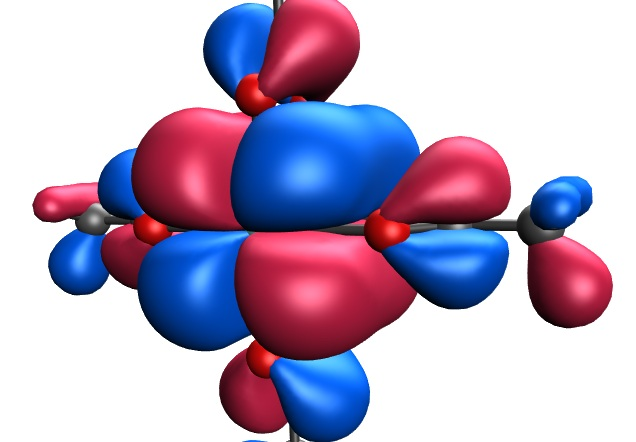

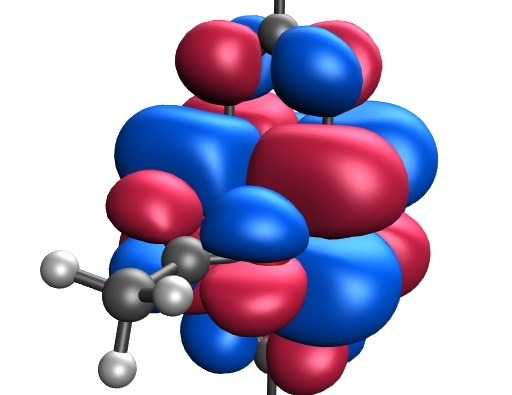

In [ ]:
#we might not want to re-run the cell above. I've exported the numbers out of the fchk file (under Alpha Orbital Energies).
e_HOMO = -1.79277097e-01
e_LUMO = -1.19545355e-01
print('The HOMO-LUMO gap in Hartree = ' + str(e_LUMO - e_HOMO))
print('The HOMO-LUMO gap in eV = ' + str((e_LUMO - e_HOMO)*27.2114))
print('The HOMO-LUMO gap in nm = ' + str(4.135667696*(10**-15)*2.99792458*(10**17)/((e_LUMO - e_HOMO)*27.2114)))
#to beat: 210 nm

The HOMO-LUMO gap in Hartree = 0.05973174199999999
The HOMO-LUMO gap in eV = 1.6253843242587998
The HOMO-LUMO gap in nm = 762.7992749471259


Our next sets of simulations will advance a thesis. Forming Lewis Base adducts is not facile[1]. These motifs are stable and not favourable to $\delta^{*}$ bond formation by accepting $\sigma^{*}$ density. The sulfate, $[Mo_2(\mu-SO_4)_4]^{4-}$ has a longer Mo-Mo bond order, likely owing to electronegativity differences depleting the $\sigma^2\pi^4\delta^2$ system. Again, it is placed 2.46 pm away from the centres. Here, we will use UFF to access the optimized measurements. Here is a quick tutorial so you can build the molecule yourself as you wish, it does require practice and instinct, so here's some tips. Keep in mind we'll model both single bonds of the sulfate facing the metal instead of appropriately alternating S-O and S=O coordination. This is just to help it pick up on geometry since otherwise UFF is wrestling with orienting the non-metal interacting S=O, S-O.

1.   Assemble the ${Mo_2}^{4+}$ core and straight lines for the alkoxy $O^-$. Put O-S on alternating sides of the O-Mo-Mo-O plane like a propellor. *Set* a 1.54 (ideal) bond using Build > Set Geometric Constraint > Set in the top persistent menu
2.   Delete that bond so the software doesn't recognize a ring. Set a *constraint* with Build > Set Geometric Constraint > Constrain to the other SO-O to 1.54. Try and have the constraints staggered across front and back of the molecule metal-metal bond to symmetrically link group rotation across Mo-Mo - equivalently, the S-O you link should not be seperated completely by bonds; it should need to pass through empty space. Constrain the Mo-Mo, Mo-O bonds to 2.11 pm and 2.46 pm respectively. Do not close any rings.
3.   Mindful of the plane we've established, place the next set of O-S-O to fit with the other ones - don't place them on the same side so the software to pick up that the eclipsed bonds cannot change relative orientation.
4.   Do the same O-S-O placement using *Set* / *Constrain* without closing rings.
5.   Place S=O once more orienting the tetrahedron to form an S where you'd expect, mindful of sterics so the software is too. Do not do anything with these bonds - their distances will be a rounding variable so UFF can move stuff around against repulsion. Now close the rings but don't set constraints, this is the stuff that's going to move without fighting repulsion.
6.   Build > Set Symmetry Tolerance > 1.0 > Apply. It might automatically move your substituents around if your geometry was too unsymmetrical. Then click on the top-toolbar the  Minimize Energy button.
7.   After undertaking the process, $\{Mo_2S_2O_4\}$ rings resemble chalcogen species like $[S_8]^{2+}$ indicating UFF has successfully predicted ligand-centred bonding. The ligands are also eclipsed, so this is a success. We clean up the S=O bonds to be 1.43 angstrom.

The S=O/S-O alternating motif that constitutes the Mo(II) state is not a problem because a bond extension suggests that oxygen is picking up density, and it is more likely to do this with lower-energy $\sigma$ orbitals. So we've made this approximation.

[2]. Housecroft, C. E.; Sharpe, A. G. d-block chemistry: the heavier metals. In *Inorganic Chemistry*, 5th ed.; Pearson, **2018**; pp 803−874


In [ ]:
print('This code takes about 17 minutes')

psi4.set_options({'reference': 'uks',
                  'maxiter': 40,
                  'optking__geom_maxiter': 500,
                  'opt_type': 'MIN',
                     })

mol = psi4.geometry("""
-4 1
Mo         0.25089        0.11630       -1.09336
Mo         0.21736        0.09458        1.02498
O         -2.15442       -0.41086        1.36624
O         -2.13617       -0.31962       -1.42157
O          2.59892        0.59895        1.28887
O          2.65152        0.54052       -1.32442
S         -2.68346       -1.02384        0.04919
S          3.00547        1.43177       -0.11339
O          0.09262       -2.33126        1.33539
O         -0.67803        1.87734        1.39500
O         -0.59820        1.92475       -1.38814
O          0.05120       -2.30700       -1.38146
S          0.72059       -2.92819        0.05561
S         -1.27918        2.44057        0.08725
O         -1.10421        3.85887        0.13930
O         -2.69943        2.27462        0.07194
O         -2.50553       -2.44266        0.03551
O          0.54879       -4.34774        0.07195
O          2.13658       -2.72869        0.06395
O          2.34124        2.69629       -0.18192
O          4.40937        1.70368       -0.11617
O         -4.10500       -0.86998        0.07012

units angstrom
symmetry c1
"""
)
d_energy, d_wfn = psi4.energy("b97-d/def2-tzvp", molecule=mol, return_wfn=True)
print(d_energy)
psi4.fchk(d_wfn, 'Mo2SO44.fchk')

The sulfate simulation is messier in its placement of the ligands. It requires a 50% isosurface to clearly see that oxygens participating in the key $\pi$ system are in antibonding configuration where they do not have zero-overlap interaction with the $\delta$ system.

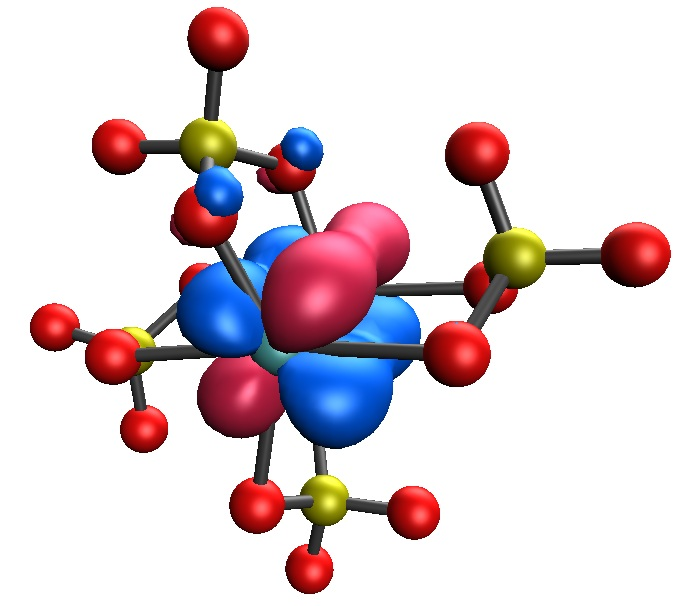

However, the following reaction oxidizes the centre:

$[Mo_2Cl_8]^{4-} \overset{[HPO_4]^{2-} in \ O_2}{\xrightarrow{}} [Mo_2(\mu-HPO_4)_4]^{2-}$

This will be compared to phosphorus activity in Re. Re is reduced by $[HPO_2]^{2-}$ which has its P-O connectivity compared to $H_3PO_4$ as the main point of comparison. Thus, you can subtract to see how much the energy climbed. Therefore, we can work out that the orbital energies are closer related to sulfur than phosphorus.

In [ ]:
#remember it was oxidized from an IV species. It must remain S = 1
print('This code takes 33 minutes')

psi4.set_options({'reference': 'uks',
                  'maxiter': 50,
                  'optking__geom_maxiter': 500,
                  'opt_type': 'MIN',
                  'fail_on_maxiter': False,
                     })

mol = psi4.geometry("""
-2 1
Mo        -0.00000       -0.00000       -1.11563
Mo        -0.00000       -0.00000        1.11563
O          2.32230        0.81028       -1.10955
O          2.32230        0.81028        1.10955
O         -2.32230       -0.81028       -1.10955
O         -2.32230       -0.81028        1.10955
P         -3.26448       -1.23600        0.00000
P          3.26448        1.23600        0.00000
O         -0.81028        2.32230        1.10955
O          0.81028       -2.32230        1.10955
O          0.81028       -2.32230       -1.10955
O         -0.81028        2.32230       -1.10955
P          1.23600       -3.26448        0.00000
P         -1.23600        3.26448        0.00000
O          3.82577        2.70105        0.00000
O          4.59722        0.51490        0.00000
O         -0.51490        4.59722        0.00000
O         -2.70105        3.82577        0.00000
O         -3.82577       -2.70105        0.00000
O         -4.59722       -0.51490        0.00000
O          0.51490       -4.59722        0.00000
O          2.70105       -3.82577        0.00000
H          3.08284       -2.94063        0.00000
H          2.94063        3.08284        0.00000
H         -3.08284        2.94063        0.00000
H         -2.94063       -3.08284        0.00000

units angstrom
symmetry c1
"""
)
d_energy, d_wfn = psi4.energy("b97-d/def2-tzvp", molecule=mol, return_wfn=True)
psi4.fchk(d_wfn, 'Mo2PO44.fchk')
n_e = d_wfn.nalpha()
e_HOMO = d_wfn.epsilon_a().np
e_HOMO = e_HOMO[n_e-1]
e_LUMO = d_wfn.epsilon_a().np
e_LUMO = e_LUMO[n_e]
print('The HOMO-LUMO gap in Hartree = ' + str(e_LUMO - e_HOMO))
print('The HOMO-LUMO gap in eV = ' + str((e_LUMO - e_HOMO)*27.2114))
print('The final HOMO-LUMO gap in nm = ' + str(4.135667696*(10**-15)*2.99792458*(10**17)/((e_LUMO - e_HOMO)*27.2114)))

The band-gap so calculated reflects, at 15146 nm, clearly IR-spectrum. However, this is not totally unexpected, as 700 nm expected in the Re equivalents is in the limits of IR spectroscopy. This probably captures low-lying phosphate resonance instead of instablity in this simulation. This is particularly true because GGA will struggle with resonance and forcing a solution will cause a low-lying distinction in the wrong part of the EM spectrum instead. If you open the .fchk file, you'll see the phosphates are placed with slight degrees of asymmetry that do not exceed the threshold by which to force a zero-overlap result.

But we didn't arbitrarily force that out. The oxygen basis functions in phosphate must have a vector decided upon which $M_{\ell}$ evolves, that's the orbital gradient following that we've been instituting in the psi4.options() dictionary. Oxygen does not align itself with the d-orbitals, and the HOMO is $\pi^{*}$ density mixed with oxygen p-orbitals. The $\delta$ LUMO more explicitly incorporates antibonding with phosphate antibonding. Hence, we've captured the phosphate stretching. Any overlap of the HOMO with the d-orbitals disappears at 85% confidence interval. Further evidence is that the HOMO is doubly degenerate, and the LUMO is 0.02 hartree higher in energy! Nearly 50 kJ/mol!

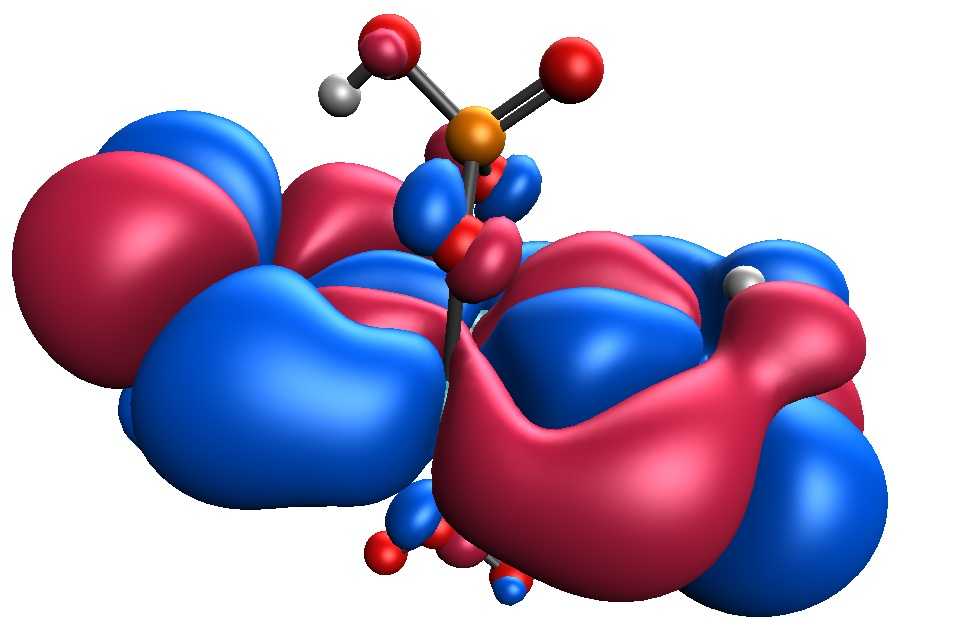

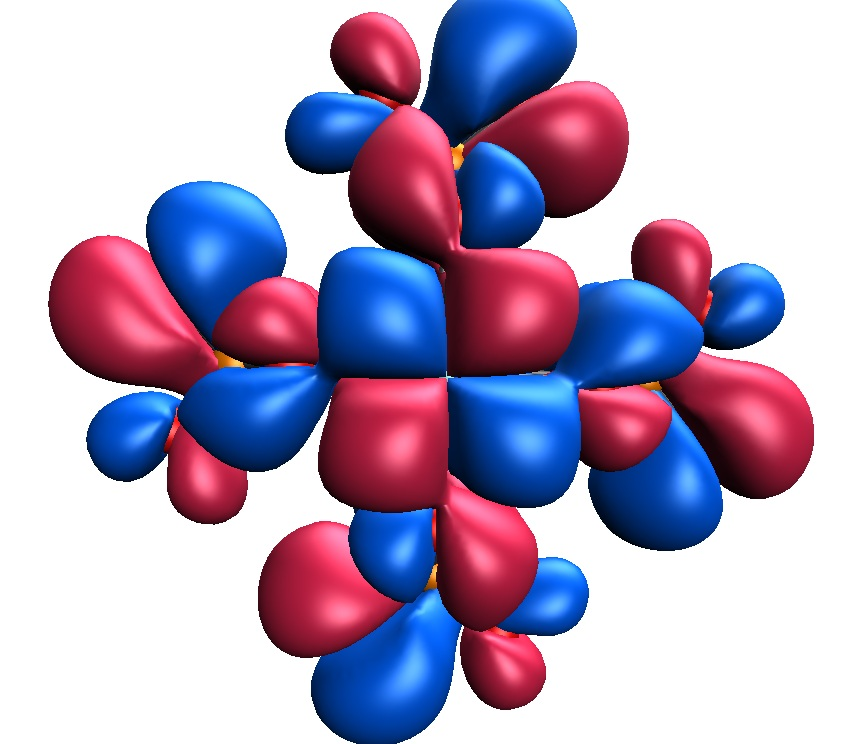

#♟ Down and Across!
Re is capable of redox-neutral substitution reaction for $O_2CMe$ species, already telling of orbitals slightly more energetic than Cl-leaving group transition state - yet not high energy enough to disrupt the metal-metal bonds. More telling, the substitution can be reversed by addition of HCl.Furthermore, $Re_3Cl_9(OH_2)_3$ has Re double bonds in a tricyclic $\sigma^6\pi^6$ structure can be isolated from aqueous solution at 273 K despite aquation enthalpies matching ionization energy in gas-phase chlorine. The orbital back-donating species must be, with double bonding, atleast lower than the transition state required to aquate chlorine. Then in higher multiple bonds, redox neutral to but lacking the reaction energy for, disruption of the complex by chelating acetate. The tricyclic can also have these positions filled by $Cl^-$ using $MCl$ reaction, including by pseudo-metallic $[NHMe_3]^+$ or $[Ph_4As]^+$. These are illustrative of the approximate energy of the orbitals.

We can start forming a picture because Zn and Ti, first row, are able to form hydrides in oxidative addition to open double bonds, including in polymerizations. Polymerization is an important observation, because the tail curling on itself should terminate the reaction quickly if the metal is releasing chains between additions, but the metals retain the ability to form hydride and retain an alkyl substituent for quantitative numbers of additions in a row. So if the d-orbital penetration places orbital energies near hydride - always drawn comically high in energy for covalent sharing schemes by organics courses - then the first row transition metal nucleus can affect hydrogen between ionic $\Psi$ and covalent $\Psi$. We so aim to demonstrate that the same thing happens another row down and the heavy metals will have the same effect as phosphorus and sulfur.

The same optimization procedure was be carried out on $[ReCl_8]^{2-}$ to find the heteroatom distances, using distances within $Re_3Cl_9$ between 2.29 - 2.40 angstom. Luckily, the act of checking excitation in the chloride for a reported blue color of red 700 nm red absorbance reveals more appropriate 2.15.

In [ ]:
print('The whole band-gap replication 25 minutes, 3 minutes per band gap any new gap')

print("Trying to match spec data, meeting 700 nm band gap")

plt.figure(2)
qzvpd_Cl = [1.62,1.67,1.97, 2.15, 2.19, 2.26, 2.34]
qzvpd_gap = [1038.4068647672796, 1211.906123249249, 1168.649877259561, 1103.082069751207 , 1116.8292203714896, 1295.5944406596784, 1851.9368506244648]
#these each take 20 minutes


plt.figure(3)
dist_Cl = [1.62, 1.67, 1.72, 1.97, 2.20, 2.32, 2.34, 2.36] ##add to this list after 2.36 not before, does not matter the value's number.
bandgaps = [866.5210930596302, 885.8268316904941, 906.4929930570846, 1024.3146478500717, 1120.969210784776,1630.151224642581, 1808.558840392349, 2029.9076793609092]

plt.title('Band-Gaps /nm (y) at different distances /angstrom (x)')

psi4.set_options({'reference': 'uks',
                  'maxiter': 18,
                  'optking__geom_maxiter': 500,
                  'opt_type': 'MIN',
                  'fail_on_maxiter': False
                     })

for i in dist_Cl:
  checker = float(i)
  index = dist_Cl.index(checker)
  if index > 7:
      operand = float(checker)
      n_operand = -1 * operand
      mol = psi4.geometry("""
      -2 1
      Re 1.12  0.0  0.0
      Re -1.12  0.0  0.0
      Cl 1.12  {0}  0.0
      Cl 1.12  {1}  0.0
      Cl 1.12  0.0  {0}
      Cl 1.12  0.0  {1}
      Cl -1.12  {0}  0.0
      Cl -1.12  {1}  0.0
      Cl -1.12  0.0  {0}
      Cl -1.12  0.0  {1}

      units angstrom
      symmetry c1
      """.format(operand, n_operand)
      )
      d_energy, d_wfn = psi4.energy("b97-d/def2-tzvp", molecule=mol, return_wfn=True)
      n_e = d_wfn.nalpha()
      e_HOMO = d_wfn.epsilon_a().np
      e_HOMO = e_HOMO[n_e-1]
      e_LUMO = d_wfn.epsilon_a().np
      e_LUMO = e_LUMO[n_e]
      print('The HOMO-LUMO gap in Hartree = ' + str(e_LUMO - e_HOMO))
      print('The HOMO-LUMO gap in eV = ' + str((e_LUMO - e_HOMO)*27.2114))
      print('The HOMO-LUMO gap in nm for ' + str(operand) +  ' angstrom = ' + str(4.135667696*(10**-15)*2.99792458*(10**17)/((e_LUMO - e_HOMO)*27.2114)))
      gap = 4.135667696*(10**-15)*2.99792458*(10**17)/((e_LUMO - e_HOMO)*27.2114)
      bandgaps.append(gap)
  else:
        pass

plt.plot(dist_Cl, bandgaps,'bo')
plt.plot([dist_Cl[0], dist_Cl[7]],[bandgaps[0],bandgaps[7]],'m--')
plt.show()
print(bandgaps)

geomfactor = (1774.7643367204719 / 700)
print('The multiplicative factor by which the 2.46 angstrom absorbance is off = ' + str(geomfactor))
geomfactor = (1659.519751744042 / 700)
print('The multiplicative factor by which the 2.52 angstrom absorbance is off = ' + str(geomfactor))

psi4.set_options({'reference': 'uks',
                  'maxiter': 25,
                  'optking__geom_maxiter': 500,
                  'opt_type': 'MIN',
                     })

mol = psi4.geometry("""
-4 1
Re 1.12  0.0  0.0
Re -1.12  0.0  0.0
Cl 1.12  2.46  0.0
Cl 1.12  -2.46  0.0
Cl 1.12  0.0  2.46
Cl 1.12  0.0  -2.46
Cl -1.12  2.46  0.0
Cl -1.12  -2.46  0.0
Cl -1.12  0.0  2.46
Cl -1.12  0.0  -2.46

units angstrom
symmetry c1
"""
)
d_energy, d_wfn = psi4.energy("b97-d/def2-tzvp", molecule=mol, return_wfn=True)
psi4.fchk(d_wfn, 'internalReCheck.fchk')
n_e = d_wfn.nalpha()
e_HOMO = d_wfn.epsilon_a().np
e_HOMO = e_HOMO[n_e-1]
e_LUMO = d_wfn.epsilon_a().np
e_LUMO = e_LUMO[n_e]
print('The final HOMO-LUMO gap in nm = ' + str(4.135667696*(10**-15)*2.99792458*(10**17)/((e_LUMO - e_HOMO)*27.2114)))
print('A multiplicative factor off experimental results in nm = ' + str(4.135667696*(10**-15)*2.99792458*(10**17)/((e_LUMO - e_HOMO)*27.2114*700)))

The bridging dppe ligand $\mu-Ph_2PCH_2CH_2PPh_2$ bridging will be capable of clamping an increase of bond length to within the strain of its backbone between Re $\sigma^2\pi^2\delta^2\delta^{*1}$ and $\sigma^2\pi^2\delta^2$. Furthermore, $[Re_2Cl_8]^{2-}$ uses $[HPO_2]^{2-}$ as an oxidant to reach its state from Re(VII), which connects the two species. Particularly, Mo used $O_2$ as its oxidant in the $HPO_4$ condensation, and $HPO_2$ differs from the phosphate ion by having two P-O connectivities changed directly for P-H. In $PO_2$ and $PO_4$ is the oxidation energy approximately equal to the diagonal difference between second/third rows of VI/VII. Furthermore, the formation of the $O_2CMe$ species is reversible to addition of HCl in the Re system, but Mo has no pH condition - it can substitute $HOOCMe$. HCl has an identical gas-phase charge-formation as aquation enthalpy, emphasizing the means by which the metallic centres are in equilibrium. In a condensation reaction, $H_3PO_4$, $[H_2PO_4]^{-}$, $[HPO_4]^{2-}$ each form branching, extending, and terminating ends of a pH-dependent phosphate condensation depending on their protonation. Re is the intermediate electronegativity for a species participating in this condensation with two fewer oxygen groups as a forced terminal templating species

Recall that phosphanes of any kind are $\pi$-acceptors, so the degree of backdonation does not exceed the backbone strength of the species. In fact, oxidation is attributed to the phosphane, indicating the degree of back-donation into $\sigma^{*}$ and X-type donation are in precise equilibrium. This was the point of the exercise - Re orbital energies are analogous in phosphorus. Unfortunately, the phenyl groups cause the simulation to exceed the time constraints of this lesson's scope. Finally, the exercise is furthered by observing that Rh (II) kinetically unstable $d^7$ species forms equilibria with different concentrations of conjugate base $MeCO_2H$. Ir can only form bridged species with one degree of reduction on nitrogen, $[(o-MePh)_2NCHN]^{-}$ but Rh can adduct $SEt_2$.

#⛳ What about the first row metals?

First row metals will be revisited in the next lesson in pursuit of field strength and geometry prediction. The size issues they face make these predictions significantly more interesting. We'll cover their heteroatom addition properties here. Acid base activity is significantly more important to first-row metals than second or third row. Their enthalpies of atomization are appropriately low, and many are attacked by non-oxidizing acids. This means the acid is not storing redox potential in coordination with these centres, because they respond more readily to changes in their environment instead of accessing band states to avoid leaving bulk.

Oxygen is highly electronegative, and similarly sized to the first rows. To properly treat it in an acid/base context requires heteroatom scales so we can get a better idea of how the crystal field splitting energy influences the geometry outcomes. First row oxides will form condensed shapes by removing proton and creating bridging complexes from the remaining oxygen connectivities in pH influenced reactions - not just the vanadates. Mononuclear aqueous cations are comparatively rare in heavy metals- so rare we can list all of them - $[Y(OH_2)_9]^{3+}$ , $[Y(OH_2)_8]^{3+}$, $[Mo(OH_2)_6]^{3+}$, $[Tc(OH_2)_3(CO)_3]^{3+}$, $[Ru(OH_2)_6]^{3+}$, $[Ru(OH_2)_6]^{3+}$, $[Rh(OH_2)_6]^{3+}$, $[Ir(OH_2)_6]^{3+}$, $[Pd(OH_2)_4]^{2+}$, $[Pt(OH_2)_4]^{2+}$,$[Ag(OH_2)_3]^{2+}$, $[Cd(OH_2)_6]^{2+}$, $[\{Hg(OH_2)\}_2]^{2+}$. The rest condense into polynuclear metallate clusters, and many heavy metals need to store redox energy in acid/base attack. As early as Zr, $\mu-F$ is forming by hydrolysis and many sites are $OH$ coordinated. One of these species stands out as being tripositive with a $\pi$-backdonor $CO$. The positively charged carbonyls are also rare and also only form late in the table in the same region. They are $[Tc(OH_2)_3(CO)_3]^{3+}$, $[Os(CO)_6]^{2+}$, $[Ir(CO)_6]^{3+}$, $[Pt(CO)_4]^{2+}$ The only explanation, particularly true by Group IX exhibiting both rare species, is that the nucleus has sufficiently increased in mass for $T_{1u}$ hybridization to stabilize $\sigma$ donation appropriately to $d^{6}$ inertness versus $\pi^{*}$. This is clearly evidenced in $[Ru_2(\mu-O_2CMe)_4Cl]_n$ exhibiting a $\pi^{*}$ energy cross-over for paramagnetic configuration $\sigma^2\pi^4\delta^2\pi^{*2}\delta^{*1}$

With that, Ru forms the equivalent to a previously discussed Ta species in $[Ru_2(\mu-N)Cl_8(OH_2)_2]^{3-}$. Both group 8 metals can form terminally bonded $[M(NH_3)_5(N_2)]^{2+}$ and Ru exclusively forms bridged $[(H_3N)_{10}Ru_2(\mu-N_2)]^{4+}$, a notably poor $\sigma$ donor. $[Os(N)O_3]^{3-}$ has measurable IR bands that give bond strengths, and its lack of a centre of inversion means an arbitrary number of vectors cannot disguise poor stoichiometry. This pnictogen affinity, upkeeping multiple bonding character with nitrogen despite orbital size mismatch, is actually a feature of group 8. Lesson 3 delves into a cyanido transfer case, but here sulfur hybrdization will be presented instead to better align with the simulation content.

FeS adopts NiAs structure - the $As^{3-}$ desire is fulfilled by Ni taking on a meta-stable $d^7$ stripping. This is a group 10 metal with a group 5 metal where all states up to maximally stable $d^8$ fulfill a bonding structure. Group 8 Fe / Group 6 S causes the $S^{2-}$ state to be fulfilled by loss to a chalcogen-equivalent count of $d^6$. In $FeS_2$, iron is now stripped to a $d^4$ state and takes on the count of an amine in an octahedral geometry. We check the sulfur, and see it to be in a tetrahedral state, exactly like $NH_4$ would be. Mn(III) species, $[Mn(N_3)(acac)_2]$ stabilizes highly exothermic-decomposer $[N_3]^{-}$ also maintaining a $d^4$ count.

$d^5$ has no CFSE. In fact, gaining or losing electrons would be favorable but only a fluoride is reported at higher oxidation states. Despite this, Br, Cl, I - completely opposite halides - each crystallize with $CdI_2$ layer structures in $MnX_2$. $CdI_2$ lay $I_2$ of consecutive layers in hexagonal close packing with weak van der waals forces operating between. Cd is known to resemble Zn closely, only approximated to differ in size, and Zn(II) balances electrons using its s-shell. In this structure, Mn acts like a bridging halide with five electrons of its own resembling a perfect paired donation (otherwise known as a bridging mode). This is only true because the half-occupied shell has an $a_{1g}$ symmetry and so incidentally acts like the perfect halide. The Fe(II) hydrates, hydroxides, and perpetually Fe-deficient FeO are well-documented - all examples of Fe losing two electrons like oxygen would but retaining oxygen valence of 6. Cr(III) species $[Cr_3(O_2CMe)_2L_3(\mu_3-O)]^{+}$ resembles carbon by $d^4$ occupancy successfully stabilizing a cage of carbonyl groups to stabilize a $\mu_3-O$ central oxygen within its bond-strains. This species is significant because $L_3$ can be a range of Lewis-base adducts including water. Subtly, $[V_{18}O_{42}]^{12-}$ is a V(V) species. Its anionic guest cavities accept lone pairs like a group 3 element. Upkeeping a V(V) state in $[V_{18}O_{42}I]^{5-}$ requires accepting $I^{7+}$, which is not likely because Vanadium is a metal and iodine is a halogen. Thus, a stoichiometric mix of $\mu-6$ and $\mu-3$ oxygens can quantify the vanadium tendency to act as an unstable lone-pair acceptor for which Al or B are frequently used in organic chemistry for this purpose.

Like Y, Sc can form coordination complexes of coordination number = 9. The Ti(IV) core $d^0$ = 0 CFSE calibrates the first row orbital energies as being between As and Cl in $TiCl_4(C_6H_4As_2)_2$. The complex is dodecahedral - not much different in geometry from square antiprismatic crystal field split, and so can be approximated as an orbital energy for $d_{z^2}$. As by the metrics above, Ti can be readily compared to carbon orbital energies except as unoccupied potential. Ti(III) compounds liberate $H_2$ from $H_2O$ to form $TiO_4$, calibrating the $-0.4\Delta_{oct}$ energy of the rutile trigonal planar oxygen environment and octahedral Ti. It may be seen to reset the hydride energy gap and $sp^2$ oxygen environment to approximately the tetrahedral $H_2O$ hybridization equivalency. This only becomes relevant to Carbon in noting that Ti(III) complex $[Ti\{(H_3N)_2CO-O\}_6]^{3+}$ does not cause nucleophilic attack and is coordinated by a carbonyl lone pair. This approximates Ti(III) $-0.4\Delta_{oct}$ to about an amide as hyperconjugation is perserved without oxidative addition. This is furthered by the famous Ziegler-Natta catalyst initiating polymerization by a C-Al bond and continuing chain migration insertion.

$[V(OH_2)_6]^{2+}$ is formed by a Zn/Hg amalgam reduction - a very important observation - because it means that its orbital energies are the gap between Zn and Hg s-shells as affected by the nuclear charge. Referencing work in lesson 4, some reaction will be introduced here. $CrO_2Cl_2$, when introduced to concentrated $KCl$ solution, precipates $K[CrO_3Cl]$. Both are tetrahedral. However, because $CrO_2Cl_2$ is a light-sensitive chlorinating agent, that is spectroscopic evidence for the bonding characteristics of an expected LMCT band because Cr(VI) straightforwardly possesses no electrons. $CrO_2Cl_2$ synthesized from $Cr_2O_7$ and concentrated $H_2SO_4$, straightforwardly the concentration and well-studied oxidation potential of the chromate give adequete measures of energy for equilibrium towards $K[CrO_3Cl]$. Further, $CrO_2Cl_2$ can have oxygens replaced by $[RN]^{2-}$, so the orbitals must be about the energetics of the one electron reduction towards a primary amine. This same means of comparison exists for $KMnO_4$, whose well known spectrum can give the bond strengths required to treat it with $HSO_3Cl$ to $ClMnO_3$ then to $ClMn[N^tBu]_3$. Identically, the reasoning is that Mn is a totally oxidized centre. Analytical techniques to determining Mn involve oxidizing $Mn(II)$ to $[MnO_4]^{-}$ by bismuthate, periodate, and peroxydisulfate - all have well studied oxidation datas. Particularly, peroxydisulfate is the product of an HCl removal reaction from $HSO_3Cl$ that continues to maintain a peroxide bond when it hydrolyzes at $273K$ to $H_2SO_5$. More precisely then, that Mn is appoximately the addition of $SO_3$ in place of proton and removal of $HCl$. Cr size causes it combine in carbides with resulting C-C bonds caused by its small size, so domain study with surface spectroscopy can be used to further carbon-like bonding characteristics in Cr. Cr is also a rare example of a quintuple metal-metal bonding species with $d_{x^2-y^2}$ participating. It may be formed by a range of delocalized, reduced nitrogen bridges - diazadiene, amidinato, guanidinato.

Co(VI) fluorides are high spin and Co(V) is low-spin, permitting measurement of $\Delta_{oct}$ influence by nuclear charge this late in the table. There is also the kinetically inert Co (III) centre, which seemingly makes an exception to combine $CoF_3$ and $N_2O_5$ at 200 K - *less than the boiling point of water* in an octahedral bidentate complex $Co(NO_3)_3$. The anhydride $N_2O_5$ is formed from dehydrating agent $P_2O_5$ and $HNO_3$ and consists in solid state of $[NO_2]^{+} + [NO_3]^{-}$. This gives a good dehydration reaction to compare the low-spin $d^6$ Co orbitals - though it should be noted in such a case that what is being measured is $e_{g}$ as accomdating oxygen density. So late in the table, achieving $d^8$ becomes a key goal to these metals. A nice exception is the NiCd battery, which hosts $Ni(O)OH$, capable of liberating $Cl_2$ from $HCl$. This means the inverse of the Born-Haber cycle for the halide can be used to determine the energetics of the Ni(III) $d^7$ configuration. The $d^8$ CFSE is so sought by metals because $d^7$ and $d^9$ are both higher energy, so a transition state is more difficult to access. However, Cu is rather oxidized in such a state given its otherwise dominant $Cu^{2+}$ chemistry. It does form a rather telling $Cu(III)$ species by $K_7[Cu(IO_6)_2]$, the iodates have a rich condensation equilibrium. They only ever form large molecular aggregates using $2[HIO_5]^{2-}$ *to* remove $2[H_3IO_6]^{2-}$ but now the $[IO_6]^{5-}$ has a competing removal pathway. Cu(III) now bridges in square planar form between equatorial oxygens. Zn is dominated by s-shell chemistry in Zn(II)



#🌍Real world connection: Energetics and making weird chemistry work for us

Often called a dry topic, you might be wondering why we don't just just subtract the overall molecular energy at the end to establish an energy scale. It's the same answer you always get when discussing enthalpy - but I'd like to frame it to excite you - it's that all of these equations are built by humans. Even the f in DFT stands for functional - a family of functions. b97-d is a group of functions that are interrelated to discuss how electrons deflect each other to the first derivative, and it's the last rung before a more negative molecular energy is not necessarily descriptive of a more stable molecule. Why? Because at that point the deflections of the deflection - the Hamiltonian - is being altered to find stability.

Using that HOMO-LUMO gap, we're still getting realistic numbers that become more of an abstraction as we descend the energy scale. As we invent new ways of describing these molecules, only the molecular energy number will become more negative, but it just takes time. On that level, using eV is reflective of that early-twentifirst century optimism, there is still so much room for us to exactly plug our error into the value of one electron being accelerated through one volt, an one-to-one map of the future.

The orbital energies are not just of interest to developing models. The existence of positively charged CO complexes is rare because of their reliance on $\pi$ donation from the metal to cooperate for stronger $\sigma$ characteristics. The ability to stabilize water ligands and carbonyl ligands simultaneously might make you think of carbon capture. In fact, this is of interest, particularly to add $COO^{-}$ to a sacrificial reductant in a Re complex [3].

[3]. Morimoto, T.; Nakajima, T.; Sawa, S.; Nakanishi, R.; Imori, D.; Ishitani, O. CO2 Capture by a Rhenium(I) Complex with the Aid of Triethanolamine. *J. Am. Chem. Soc.* **2013**, *135*, 16825–16828